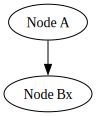

In [1]:
from graphviz import Digraph
from IPython.display import display, SVG

def display_graph():
    graph = Digraph('G', filename='graph.gv', format='svg', engine='dot')
    graph.node('A', 'Node A')
    graph.node('B', 'Node Bx')
    graph.edge('A', 'B')
    return graph

# Create the graph
graph = display_graph()

# Render the graph and display it in the notebook
display(SVG(graph.pipe().decode()))

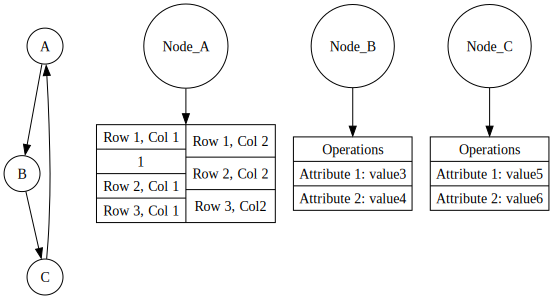

In [6]:
from graphviz import Source
dot_graph = """
digraph G {
    node [shape=circle];
    // rankdir=LR; // Set the layout direction to left-to-right

    A -> B;
    B -> C;
    C -> A;
    
    // Record-type nodes with associated attributes 
    A_label [shape=record, label="{Row 1, Col 1|1|Row 2, Col 1|Row 3, Col 1}|{Row 1, Col 2|Row 2, Col 2|Row 3, Col2}"];
    B_label [shape=record, label="{Operations|Attribute 1: value3|Attribute 2: value4}"];
    C_label [shape=record, label="{Operations|Attribute 1: value5|Attribute 2: value6}"];
 
    
    // Connections between nodes and corresponding record-type nodes
    Node_A -> A_label;
    Node_B -> B_label;
    Node_C -> C_label;
}
"""

# Create a Source object from the DOT format graph
source = Source(dot_graph, format='svg')

# Display the graph in the notebook
display(source)

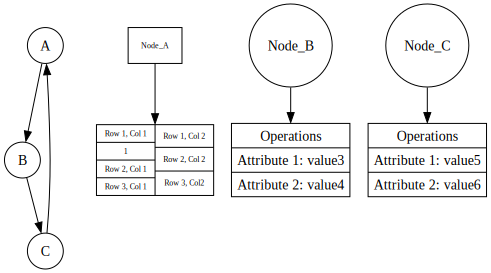

In [11]:
from graphviz import Source
dot_graph = """
digraph G {
    node [shape=circle];
    // rankdir=LR; // Set the layout direction to left-to-right

    A -> B;
    B -> C;
    C -> A;
    
    // Record-type nodes with associated attributes 
    A_label [shape=record, fontsize=8, label="{Row 1, Col 1|1|Row 2, Col 1|Row 3, Col 1}|{Row 1, Col 2|Row 2, Col 2|Row 3, Col2}"];
    B_label [shape=record, label="{Operations|Attribute 1: value3|Attribute 2: value4}"];
    C_label [shape=record, label="{Operations|Attribute 1: value5|Attribute 2: value6}"];

     Node_A [shape=record, fontsize=8];
    
    // Connections between nodes and corresponding record-type nodes
    Node_A -> A_label;
    Node_B -> B_label;
    Node_C -> C_label;
}
"""

# Create a Source object from the DOT format graph
source = Source(dot_graph, format='svg')

# Display the graph in the notebook
display(source)

In [3]:
import genai as ai

#scraper = ai.Scraper();

Current Directory: /Users/raymondordona/Workspace/genaiproj/notebook
******************************************************************************************
*************************** GENAI Module Loading *****************************************
******************************************************************************************


In [ ]:
scraper.crawl('http://localhost:8888/notebooks/sample.html', 1);

In [1]:
import genai as ai

# Define the URLFrontier class wrapper in Python
class URLFrontier:
    def __init__(self, max_urls=1000, queue_address=''):
        self._urlfrontier = ai.URLFrontier(max_urls, queue_address.encode('utf-8'))

    def enqueue(self, url, priority_percentage):
        url_bytes = url.encode('utf-8')
        self._urlfrontier.enqueue(url_bytes, priority_percentage)

    def start_worker_threads(self):
        self._urlfrontier.startWorkerThreads()

# Example usage:
if __name__ == '__main__':
    url_frontier = URLFrontier(max_urls=100, queue_address='tcp://127.0.0.1:5555')

    # Enqueue URLs with priority percentages
    url_frontier.enqueue('http://example.com/page1', 80)
    url_frontier.enqueue('http://example.com/page2', 50)

    # Start worker threads
    url_frontier.start_worker_threads()

ImportError: dlopen(/usr/local/lib/python3.11/site-packages/genai.abi3.so, 0x0002): symbol not found in flat namespace '__ZN11URLFrontier10processUrlERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'

In [ ]:
class MyTokenModel(ai.BPETokenizer):

   def __init__(self):
     super().__init__();


tokenizer = ai.BPETokenizer();



In [5]:
import genai as ai
class MyModel(ai.BaseModel):

   def __init__(self):
     super().__init__();

     print("Creating a Graph!")
     graph = ai.Graph();

     print("Add Node 1 ...")
     embedding1 = [[1.0, 2.0, 3.0, 4.0], [3.0, 4.0, 5.0, 6.0]]
     node1 = graph.addNode("Node 1", ai.NodeType.Input, embedding1)
     node1.setOperations([ai.Encoder(heads=2, size=3, bias=True, type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.FeedForward(size=2, bias=True, type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Attention(heads=1, size=2, bias=False), ai.Activation(type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Linear(size=2, bias=True), ai.BatchNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Linear(size=2, bias=True)]);

     print("Add Node 3 ...")
     node3 = graph.addNode("Node 3", ai.NodeType.Output)
     #node3.setOperations([ai.Linear(size=3, bias=True), ai.LayerNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]) 
     node3.setOperations([ai.Linear(size=3, bias=True), ai.Activation(type="leakyrelu", alpha=0.01)]) 
     #node3.setOperations([ai.Linear(size=3, bias=True)]) 
     # embedding = [[1.0, 2.0, 3.0], [3.0, 4.0, 6.0]]
     # graph.setData(embedding);

     # assign to the instance
     self.graph = graph;
     self.node1 = node1
     self.node3 = node3

     print("Connect nodes ...");
     self.graph.connect(self.node1, self.node3);

     self.setGraph(self.graph);

model = MyModel();


ImportError: dlopen(/usr/local/lib/python3.11/site-packages/genai.abi3.so, 0x0002): symbol not found in flat namespace '__ZN10TokenModelIdE10trainGloVeERSt6vectorINSt7__cxx1112basic_stringIwSt11char_traitsIwESaIwEEESaIS7_EEidi'

In [ ]:
target = [[1.0, 2.0, 3.0], [3.0, 4.0, 5.0]];
model.setTarget(target);
model.train(loss="mse", optimizer="adam", learnrate=0.01, iter=20);

In [ ]:
mydot = model.graph.generateDotFormat()
mydot 

In [ ]:
from graphviz import Source

# Create a Source object from the DOT format graph
source = Source(mydot, format='svg')

# Display the graph in the notebook
display(source)

In [1]:
import genai as ai
import numpy as np
ai.print_string("Hello", True)

#class MyModel(ai.Model):
#
#   def __init__(self, learningRate, datatype):
#     super().__init__(learningRate, datatype);

sample = ai.SampleClass(0.01);

dtype = "float"
modelgraph = ai.Model(learningRate=0.02, datatype=dtype);

node1  = modelgraph.addNode("node1", ai.NodeType.Input);
#node1.setOperations([ ai.Dense(size=5), ai.Activation(type="leakyrelu", alpha=0.01) ]);
node1.setOperations([ai.Encoder(heads=2, attention_size=6, feed_size=4, layers=1, bias=True, type="leakyrelu", alpha=0.01)]);
#node1.setOperations([ai.FeedForward(size=2, bias=True, type="leakyrelu", alpha=0.01)]);
#node1.setOperations([ai.Attention(size=5, bias=False, masked=False), ai.Activation(type="leakyrelu", alpha=0.01)]);
#node1.setOperations([ai.Dense(size=2, bias=True), ai.LayerNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]);

# MANY_TO_MANY
#node1.setOperations([ai.RNN(hidden_size=6, output_size=5,  num_layers=1, bidirectional=True, rnntype=ai.RNNtype.MANY_TO_MANY), ai.Activation(type="gelu", alpha=0.01)]);
#node1.setOperations([ai.LSTM(hidden_size=6, output_size=5, num_layers=1, bidirectional=True, rnntype=ai.RNNtype.MANY_TO_MANY), ai.Activation(type="leakyrelu", alpha=0.01)]);
#node1.setOperations([ai.GRU(hidden_size=6, output_size=5, num_layers=1, bidirectional=True, rnntype=ai.RNNtype.MANY_TO_MANY), ai.Activation(type="leakyrelu", alpha=0.01)]);

# ONE_TO_MANY
#node1.setOperations([ai.RNN(hidden_size=6, output_size=5, output_sequence_length=3, num_layers=1, bidirectional=False, rnntype=ai.RNNtype.ONE_TO_MANY), ai.Activation(type="leakyrelu", alpha=0.01)]);
#node1.setOperations([ai.LSTM(hidden_size=6, output_size=5, output_sequence_length=3, num_layers=1, bidirectional=False, rnntype=ai.RNNtype.ONE_TO_MANY), ai.Activation(type="leakyrelu", alpha=0.01)]);
#node1.setOperations([ai.GRU(hidden_size=6, output_size=5, output_sequence_length=3, num_layers=1, bidirectional=False, rnntype=ai.RNNtype.ONE_TO_MANY), ai.Activation(type="leakyrelu", alpha=0.01)]);

node2  = modelgraph.addNode("node2", ai.NodeType.Input);
#node2.setOperations([ai.Dense(size=4, bias=True), ai.Activation(type="gelu", alpha=0.01)])
node2.setOperations([ai.Decoder(heads=2,  attention_size=6, feed_size=4, layers=1,  bias=True, type="leakyrelu", alpha=0.01), 
                     ai.Dense(size=4, bias=True), ai.Activation(type="leakyrelu", alpha=0.01)]);

embedding1 = [
               [  [1.11,1.12,1.13,1.14],  [1.21,1.22,1.23,1.24], [1.31,1.32,1.33,1.34]  ], # sequence 1 of batch 1,2,3
               [  [2.11,2.12,2.13,2.14],  [2.21,2.22,2.23,2.24], [2.31,2.32,2.33,2.34]  ], # sequence 2 of batch 1,2,3
               [  [3.11,3.12,3.13,3.14],  [3.21,3.22,3.23,3.24], [3.31,3.32,3.33,3.34]  ], # sequence 3 of batch 1,2,3
               [  [4.11,4.12,4.13,4.14],  [4.21,4.22,4.23,3.24], [4.31,4.32,4.33,5.34]  ], # sequence 4 of batch 1,2,3
               [  [5.11,5.12,5.13,5.14],  [5.21,5.22,5.23,3.24], [5.31,5.32,5.33,5.34]  ]  # sequence 5 of batch 1,2,3
             ];

embedding2 = [
               [  [1.11,1.12,1.13,1.14],  [1.21,1.22,1.23,1.24], [1.31,1.32,1.33,1.34]  ], # sequence 1 of batch 1,2,3
               [  [2.11,2.12,2.13,2.14],  [2.21,2.22,2.23,2.24], [2.31,2.32,2.33,2.34]  ], # sequence 2 of batch 1,2,3
               [  [3.11,3.12,3.13,3.14],  [3.21,3.22,3.23,3.24], [3.31,3.32,3.33,3.34]  ], # sequence 3 of batch 1,2,3
               [  [4.11,4.12,4.13,4.14],  [4.21,4.22,4.23,3.24], [4.31,4.32,4.33,5.34]  ], # sequence 4 of batch 1,2,3
               [  [5.11,5.12,5.13,5.14],  [5.21,5.22,5.23,3.24], [5.31,5.32,5.33,5.34]  ]  # sequence 5 of batch 1,2,3
             ];

node1.setData(data = np.array(embedding1, dtype=np.float32), normalize=False);
node2.setDecoderData(data = np.array(embedding2, dtype=np.float32), normalize=False);

modelgraph.connect(node1, node2);

target = [
           [  [2.11,2.12,2.13,2.14],  [2.21,2.22,2.23,2.24], [2.31,2.32,2.33,2.34]  ], # sequence 1 of batch 1,2,3
           [  [3.11,3.12,3.13,3.14],  [3.21,3.22,3.23,3.24], [3.31,3.32,3.33,3.34]  ], # sequence 2 of batch 1,2,3
           [  [4.11,4.12,4.13,4.14],  [4.21,4.22,4.23,3.24], [4.31,4.32,4.33,5.34]  ], # sequence 3 of batch 1,2,3
           [  [5.11,5.12,5.13,5.14],  [5.21,5.22,5.23,3.24], [5.31,5.32,5.33,5.34]  ], # sequence 4 of batch 1,2,3
           [  [6.11,6.12,6.13,6.14],  [6.21,6.22,6.23,6.24], [6.31,6.32,6.33,6.34]  ]  # sequence 5 of batch 1,2,3
         ];
modelgraph.setTarget(target);
modelgraph.train(loss="mse", optimizer="adam", learnrate=0.1, maxiteration=1);

ai.print_string("Done.", True)

ai.print_string("Show Graph ...", True);
dot_graph = modelgraph.generateDotFormat(operators=True, weights=False);
print(dot_graph);
ai.print_string("end show ...", True);



Current Directory: /Users/raymondordona/Workspace/genaiproj/notebook
Hello


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. genai.Model(dtype: genai.DataType = <DataType.float32: 0>, seed: int = 2017)

Invoked with: kwargs: learningRate=0.02, datatype='float'

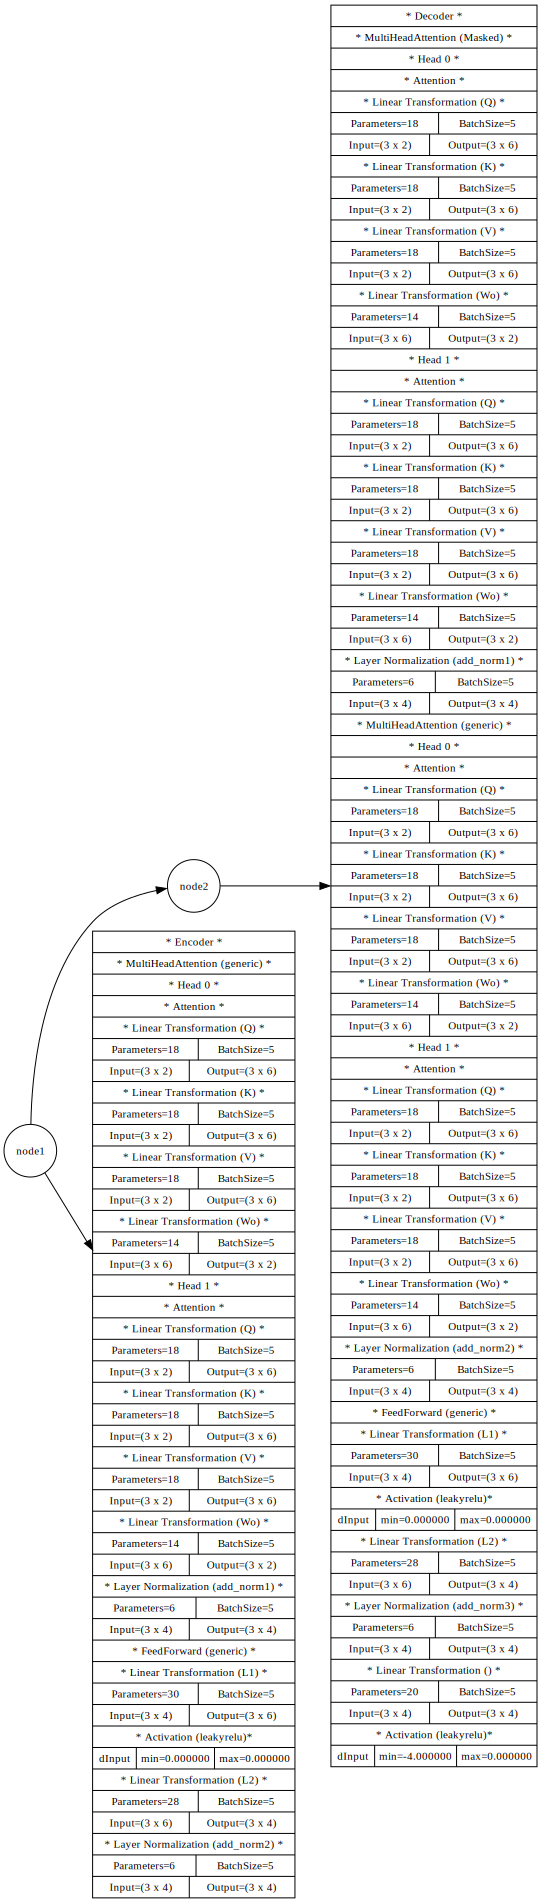

In [18]:
from graphviz import Source
source = Source(dot_graph, format='svg')

# Display the graph in the notebook
display(source)



In [5]:
import genai as ai
import numpy as np
ai.print_string("Hello", True)

#class MyModel(ai.Model):
#
#   def __init__(self, learningRate, datatype):
#     super().__init__(learningRate, datatype);

sample = ai.SampleClass(0.01);

dtype = "float"
modelgraph = ai.Model(learningRate=0.02, datatype=dtype);

node1  = modelgraph.addNode("node1", ai.NodeType.Input);
node1.setOperations([ai.Convolution(kernel_size=2, stride=1, padding=1, dilation=1, bias=True), ai.BatchNorm(), ai.LayerNorm()]);

node2  = modelgraph.addNode("node2", ai.NodeType.Input);
node2.setOperations([ai.Convolution(kernel_size=2, stride=1, padding=1, dilation=1, bias=True),
                     ai.Flatten(),
                     ai.Dropout(probability = 0.05),
                     ai.Dense(size=4, bias=True),
                     ai.Activation(type="softmax", alpha=0.01)]);

embedding1 = [
               [  [1.11,8.12,1.13,5.14],  [1.21,1.22,1.23,13.24], [1.31,5.32,2.33,1.34]  ], # sequence 1 of batch 1,2,3
               [  [4.11,2.12,6.13,2.14],  [2.21,2.22,2.23,2.24], [9.31,3.32,8.33,0.34]  ], # sequence 2 of batch 1,2,3
               [  [3.11,3.12,3.13,3.14],  [3.21,5.22,4.23,3.24], [0.31,3.32,3.33,3.34]  ], # sequence 3 of batch 1,2,3
               [  [4.11,2.12,8.13,4.14],  [4.21,4.22,9.23,8.24], [8.31,6.32,4.33,1.34]  ], # sequence 4 of batch 1,2,3
               [  [5.11,9.12,5.13,5.14],  [6.21,2.22,5.23,13.24], [1.31,5.32,5.33,12.34]  ]  # sequence 5 of batch 1,2,3
             ];

node1.setData(data = np.array(embedding1, dtype=np.float32), normalize=True);

modelgraph.connect(node1, node2);

target = [
           [  [1.00, 0.00, 0.00, 0.00 ]  ],
           [  [0.00, 1.00, 0.00, 0.00 ]  ],
           [  [0.00, 0.00, 1.00, 0.00 ]  ],
           [  [0.00, 0.00, 0.00, 1.00 ]  ],
           [  [1.00, 0.00, 0.00, 0.00 ]  ]
         ];
modelgraph.setTarget(target);

modelgraph.train(loss="cce", metrics=[], optimizer="adam", learnrate=0.1, maxepoch=1);

ai.print_string("Show Graph ...", True);
dot_graph = modelgraph.generateDotFormat(operators=True, weights=False);
print(dot_graph);
ai.print_string("end show ...", True);


ai.print_string("Done.", True)

Hello
Epoch 1/1 ... Loss: 1.32875 ... elapsed 0.000257 at Mon Oct 30 07:48:13 2023

Show Graph ...
digraph G {  node [shape=circle, fontsize=11]; rankdir=LR; node1; node2; node1->node2;node1_label [shape=record, fontsize=11, label="{* Convolution () *}|{Parameters=6|BatchSize=5}|{Input=(3 x 4)|Kernel=(2 x 2)|Output=(4 x 4)}|{* Batch Normalization () *}|{Parameters=8|BatchSize=5}|{Input=(4 x 4)|Output=(4 x 4)}|{* Layer Normalization () *}|{Parameters=8|BatchSize=5}|{Input=(4 x 4)|Output=(4 x 4)}"]; node1->node1_label;node2_label [shape=record, fontsize=11, label="{* Convolution () *}|{Parameters=6|BatchSize=5}|{Input=(4 x 4)|Kernel=(2 x 2)|Output=(5 x 5)}|{* Flatten Layer () *}|{Original=( 5 x 5)|Flattened=(1 x 25)}|{* Dropout Layer () *}|{Probability=0.050000}|{* Linear Transformation () *}|{Parameters=104|BatchSize=5}|{Input=(1 x 25)|Output=(1 x 4)}|{* Activation (softmax)*}|{dInput|min=0.000000|max=0.000000}"]; node2->node2_label;}
end show ...
Done.
Got here :float learningRate 0.02

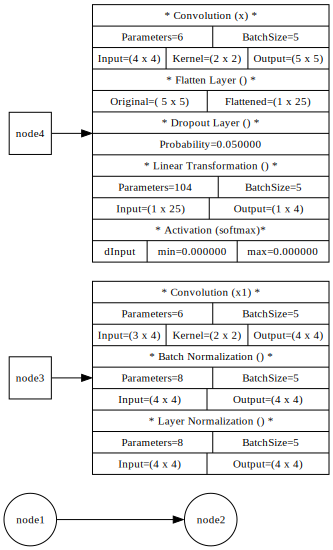

In [6]:
from graphviz import Source
# Create a Source object from the DOT format graph
# dot_graph = 'digraph G {  node [shape=circle, fontsize = 10];  rankdir=LR;  node1; node2; node1->node2;node1_label [shape=record, label="{* Convolution (generic) *}|{Weights|min=-0.400651|max=0.776730}|{Biases|min=-0.211011|max=0.257804}"]; node1->node1_label;node2_label [shape=record, label="{* Convolution (generic) *}|{Weights|min=0.012984|max=0.993517}|{Biases|min=-0.305414|max=-0.210665}|{* Flatten Layer (generic) *}|{InputHeight=5}|{InputWidth=5}|{* Dropout Layer (generic) *}|{Probability=0.050000}|{* Linear Transformation (generic) *}|{Weights|min=-0.868125|max=0.808419}|{Biases|min=-0.319614|max=0.105928}|{* Activation (softmax)*}|{dInput|min=0.000000|max=0.000000}"]; node2->node2_label;}'
dot_graph = 'digraph G {  node [shape=circle, fontsize=11]; rankdir=LR; node1->node2; node [shape=square, fontsize=11]; node3->node1_label; node4->node2_label; node1_label [shape=record, fontsize=11, label="{* Convolution (x1) *}|{Parameters=6|BatchSize=5}|{Input=(3 x 4)|Kernel=(2 x 2)|Output=(4 x 4)}|{* Batch Normalization () *}|{Parameters=8|BatchSize=5}|{Input=(4 x 4)|Output=(4 x 4)}|{* Layer Normalization () *}|{Parameters=8|BatchSize=5}|{Input=(4 x 4)|Output=(4 x 4)}"]; node2_label [shape=record, fontsize=11, label="{* Convolution (x) *}|{Parameters=6|BatchSize=5}|{Input=(4 x 4)|Kernel=(2 x 2)|Output=(5 x 5)}|{* Flatten Layer () *}|{Original=( 5 x 5)|Flattened=(1 x 25)}|{* Dropout Layer () *}|{Probability=0.050000}|{* Linear Transformation () *}|{Parameters=104|BatchSize=5}|{Input=(1 x 25)|Output=(1 x 4)}|{* Activation (softmax)*}|{dInput|min=0.000000|max=0.000000}"]; }'
source = Source(dot_graph, format='svg')

# Display the graph in the notebook
display(source)